Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [43]:
import json
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
symbol = 'BTCUSDT'
from_timestamp = int(datetime.datetime(year=2022,month=1,day=1).timestamp())
to_timestamp = int(datetime.datetime(2022,12,31).timestamp())

wallex = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={from_timestamp}&to={to_timestamp}'

r= requests.get(wallex)
r

<Response [200]>

In [45]:
data=r.json()
data.keys()

dict_keys(['s', 't', 'c', 'o', 'h', 'l', 'v'])

In [46]:
df=pd.DataFrame(data,columns=['t','c','o','h','l'])
df.rename(columns={'t':'date_time','c':'close','o':'open','h':'high','l':'low'},inplace=True)
df

,date_time,close,open,high,low
0,1640984400,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000
1,1640988000,46657.4500000000000000,47265.7000000000000000,47265.7000000000000000,46400.0000000000000000
2,1640991600,46000.0000000000000000,46100.0000000000000000,46176.7900000000000000,46000.0000000000000000
3,1640995200,45800.1100000000000000,45900.0000000000000000,45900.0000000000000000,45800.1100000000000000
4,1640998800,46146.4300000000000000,46124.8500000000000000,46155.7100000000000000,45946.2800000000000000
...,...,...,...,...,...
8586,1672416000,16568.6100000000000000,16389.6900000000000000,16568.6100000000000000,16388.6900000000000000
8587,1672419600,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000
8588,1672423200,16560.2200000000000000,16504.1800000000000000,16566.6600000000000000,16504.1800000000000000
8589,1672426800,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000


###### datetime.datetime.fromtimestamp(int(df['date_time'][5]))


In [47]:
df['date_time']=df['date_time'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))


In [48]:
df.set_index('date_time', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8591 entries, 2022-01-01 00:30:00 to 2022-12-30 23:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   8591 non-null   object
 1   open    8591 non-null   object
 2   high    8591 non-null   object
 3   low     8591 non-null   object
dtypes: object(4)
memory usage: 335.6+ KB


In [49]:
df

,close,open,high,low
date_time,,,,
2022-01-01 00:30:00,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000
2022-01-01 01:30:00,46657.4500000000000000,47265.7000000000000000,47265.7000000000000000,46400.0000000000000000
2022-01-01 02:30:00,46000.0000000000000000,46100.0000000000000000,46176.7900000000000000,46000.0000000000000000
2022-01-01 03:30:00,45800.1100000000000000,45900.0000000000000000,45900.0000000000000000,45800.1100000000000000
2022-01-01 04:30:00,46146.4300000000000000,46124.8500000000000000,46155.7100000000000000,45946.2800000000000000
...,...,...,...,...
2022-12-30 19:30:00,16568.6100000000000000,16389.6900000000000000,16568.6100000000000000,16388.6900000000000000
2022-12-30 20:30:00,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000
2022-12-30 21:30:00,16560.2200000000000000,16504.1800000000000000,16566.6600000000000000,16504.1800000000000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8591 entries, 2022-01-01 00:30:00 to 2022-12-30 23:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   8591 non-null   object
 1   open    8591 non-null   object
 2   high    8591 non-null   object
 3   low     8591 non-null   object
dtypes: object(4)
memory usage: 335.6+ KB


In [51]:
for column in df.columns:
    df[column] = df[column].astype(float)
    
    
    
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8591 entries, 2022-01-01 00:30:00 to 2022-12-30 23:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   8591 non-null   float64
 1   open    8591 non-null   float64
 2   high    8591 non-null   float64
 3   low     8591 non-null   float64
dtypes: float64(4)
memory usage: 335.6 KB


In [52]:
df_t = df.loc['2022-01-01 00:00:00': '2022-12-01 23:59:59']
df_t

,close,open,high,low
date_time,,,,
2022-01-01 00:30:00,46850.00,46850.00,46850.00,46850.00
2022-01-01 01:30:00,46657.45,47265.70,47265.70,46400.00
2022-01-01 02:30:00,46000.00,46100.00,46176.79,46000.00
2022-01-01 03:30:00,45800.11,45900.00,45900.00,45800.11
2022-01-01 04:30:00,46146.43,46124.85,46155.71,45946.28
...,...,...,...,...
2022-12-01 19:30:00,17003.37,17000.00,17018.91,16987.69
2022-12-01 20:30:00,17003.37,17003.37,17003.37,17003.37
2022-12-01 21:30:00,17003.37,17003.37,17003.37,17003.37


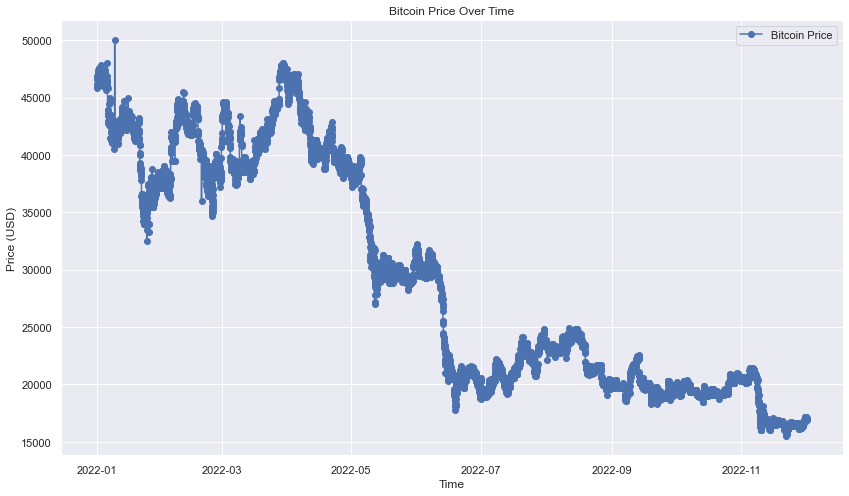

In [53]:

sns.set_theme()

plt.figure(figsize=(14, 8))  
plt.plot(df_t.index, df_t['close'], label='Bitcoin Price',marker='o',  linestyle="-")
plt.title('Bitcoin Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from statsmodels.tsa.stattools import adfuller

df_t['Differenced'] = df_t['close'].diff(1)

df_t.dropna(inplace=True)

result = adfuller(df_t['Differenced'])
p_value = result[1]

if p_value < 0.05:
    print("st")
else:
    print("not st")


C:\Users\negar\AppData\Local\Temp\ipykernel_10852\3413326185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['Differenced'] = df_t['close'].diff(1)
C:\Users\negar\AppData\Local\Temp\ipykernel_10852\3413326185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.dropna(inplace=True)


st


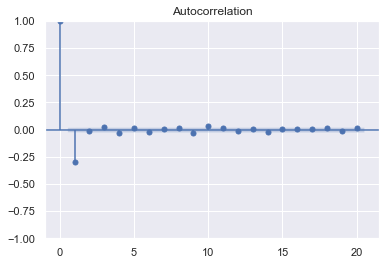

C:\Users\negar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


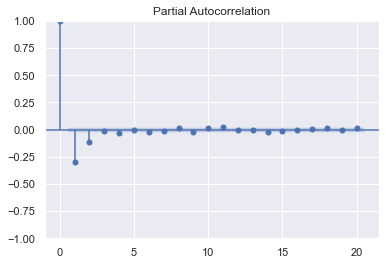

In [55]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_t['Differenced'], lags=20)
plt.show()
plot_pacf(df_t['Differenced'], lags=20)
plt.show()


In [56]:
from statsmodels.tsa.arima.model import ARIMA
p = 2  
d = 1 
q = 3

model = ARIMA(df['close'], order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\negar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\negar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\negar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 8591
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -61644.602
Date:                Mon, 09 Oct 2023   AIC                         123301.205
Time:                        22:35:11   BIC                         123343.555
Sample:                             0   HQIC                        123315.649
                               - 8591                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5120      0.019    -77.955      0.000      -1.550      -1.474
ar.L2         -0.9478      0.019    -48.906      0.000      -0.986      -0.910
ma.L1          1.1826      0.020     59.446      0.0

C:\Users\negar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
n_forecast = 3

forecast = model_fit.forecast(steps=n_forecast)
print("Bitcoin Price Forecast for the Next 3 Hours:")
forecast


Bitcoin Price Forecast for the Next 3 Hours:


C:\Users\negar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8591    16575.993009
8592    16574.216500
8593    16573.991832
Name: predicted_mean, dtype: float64

In [58]:

train_data, test_data = train_test_split(df_t, test_size=0.2, random_state=42)

print("tarin", len(train_data))
print("test:", len(test_data))


tarin 6315
test: 1579


In [59]:

forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')
forecast_values.append(forecast)

actual_values = test_data['close'].values

mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


ValueError: Found input variables with inconsistent numbers of samples: [1579, 4]